In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
men_faces = np.load('gender_data/men_faces.npy')
women_faces = np.load('gender_data/women_faces.npy')

In [3]:
men_faces.shape

(304, 2500)

In [4]:
women_faces.shape

(315, 2500)

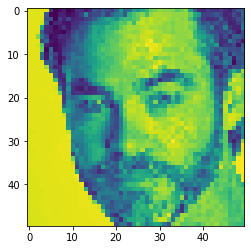

In [88]:
plt.imshow(men_faces[10].reshape(50,50))

In [8]:
data = np.r_[men_faces, women_faces]

In [9]:
data.shape

(619, 2500)

In [10]:
labels = np.zeros(data.shape[0])

In [11]:
labels[304:] = 1.0

In [52]:
def distance(x1, x2):
    d = 0
    for i in range(len(x1)):
        d += (x1[i] - x2[i]) ** 2
    return np.sqrt(d)

In [13]:
def find_neighbors(data, target, k):
    d = []
    for row in data:
        dist = distance(target, row)
        d.append(dist)
    d = np.asarray(d)
    sorted_index = np.argsort(d)
    k_neighbors = labels[sorted_index][:k]
    count = np.unique(k_neighbors, return_counts=True)
    return count

In [71]:
test_img = cv2.imread('gender_data/test_img_2.jpeg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [72]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [73]:
haar_data.detectMultiScale(test_img)

array([[197, 111, 125, 125]], dtype=int32)

In [74]:
face = haar_data.detectMultiScale(test_img)

In [75]:
x,y,w,h = face[0]
face_img = test_img[y:y+h, x:x+w]

In [76]:
face_img.shape

(125, 125)

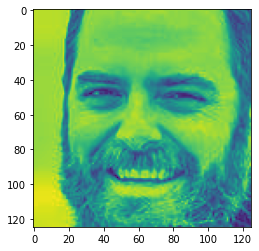

In [77]:
plt.imshow(face_img)

In [78]:
face_img = cv2.resize(face_img, (50,50))
face_img = face_img / 255.0

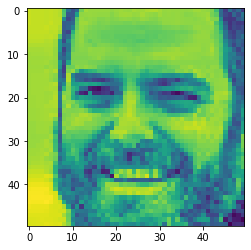

In [79]:
plt.imshow(face_img)

In [80]:
face_img = face_img.flatten()

In [81]:
face_img.shape

(2500,)

In [82]:
number_of_k = [3,5,7,9,11,13,15,17,19]
for i in range(len(number_of_k)):
    n = find_neighbors(data, face_img, k=number_of_k[i])
    print(n)

(array([0., 1.]), array([2, 1], dtype=int64))
(array([0., 1.]), array([4, 1], dtype=int64))
(array([0., 1.]), array([5, 2], dtype=int64))
(array([0., 1.]), array([7, 2], dtype=int64))
(array([0., 1.]), array([8, 3], dtype=int64))
(array([0., 1.]), array([9, 4], dtype=int64))
(array([0., 1.]), array([9, 6], dtype=int64))
(array([0., 1.]), array([9, 8], dtype=int64))
(array([0., 1.]), array([11,  8], dtype=int64))
